## PartA)

In [1]:
import pandas as pd
import pickle
import pyLDAvis
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from gensim import corpora, models
from pyLDAvis.gensim import prepare

C:\Users\analu\anaconda3\lib\site-packages\botocore\vendored\requests\packages\urllib3\_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
C:\Users\analu\anaconda3\lib\site-packages\botocore\vendored\requests\packages\urllib3\_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping
C:\Users\analu\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
C:\Users\analu\anaconda3\lib\site-packages\gensim\models\doc2vec.py:73: DeprecationWarning: Using or importing the ABCs 

In [2]:
#Loading the newsgroupd data
df = pd.read_json("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")

#loading the stemmed data with pickle
stem_data = pickle.load( open( "stemmed_data.p", "rb" ))

In [3]:
#adding preprocessed data to the DF
df['preprocessed']= stem_data
df.head()

,content,target,target_names,preprocessed
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,car wonder enlighten car saw dai door sport ca...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,clock poll final final clock report acceler cl...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,question folk mac plu final gave ghost weekend...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,weitek robert kyanko rob rjck uucp wrote abrax...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,shuttl launch question articl cowcb world std ...


In [4]:
#Filtering
filtered_df = df[(df["target_names"]== 'soc.religion.christian')  
             |(df["target_names"]=='rec.sport.hockey')
             |(df["target_names"]=='talk.politics.mideast')
             |(df["target_names"]=='rec.motorcycles')]

filtered_df.tail()

,content,target,target_names,preprocessed
11298,From: cbetz@radioman.cray.com (Charles Betz {...,10,rec.sport.hockey,nhl team milwauke read report possibl nhl move...
11299,From: 2120788@hydra.maths.unsw.EDU.AU ()\nSubj...,17,talk.politics.mideast,turkei cypru bosnia serbia greec armenia azeri...
11300,From: aa888@freenet.carleton.ca (Mark Baker)\n...,15,soc.religion.christian,arrog christian previou articl phsd vaxc monas...
11305,From: shaig@composer.think.com (Shai Guday)\nS...,17,talk.politics.mideast,hezbollah apr yuma acn colost edu repli long l...
11313,From: gunning@cco.caltech.edu (Kevin J. Gunnin...,8,rec.motorcycles,stolen cbrrr stolen pasadena blue white honda ...


In [5]:
#TF-IDF Vectorizer
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=0.1, smooth_idf=False)

#TF-IDF frequencies
data_tfidf = vec_tfidf.fit_transform(filtered_df['preprocessed'])

#Feature names
words = vec_tfidf.get_feature_names()

## Part B)

In [6]:
kmeans = KMeans(n_clusters = 4, max_iter=1000)
kmeans.fit(data_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
#Last words (most common) of the centroids list of words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]

#Most common words for each cluster
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : game, team, plai, hockei, edu, year, write, new, think, time
1 : com, bike, dod, articl, write, edu, like, apr, good, new
2 : god, christian, believ, peopl, edu, think, know, question, rutger, word
3 : edu, israel, write, peopl, articl, new, know, time, right, like


In [8]:
filtered_df.loc[:,'clusters'] = kmeans.labels_
filtered_df.head()

C:\Users\analu\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\analu\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,content,target,target_names,preprocessed,clusters
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,1
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,0
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,2
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,3
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,3


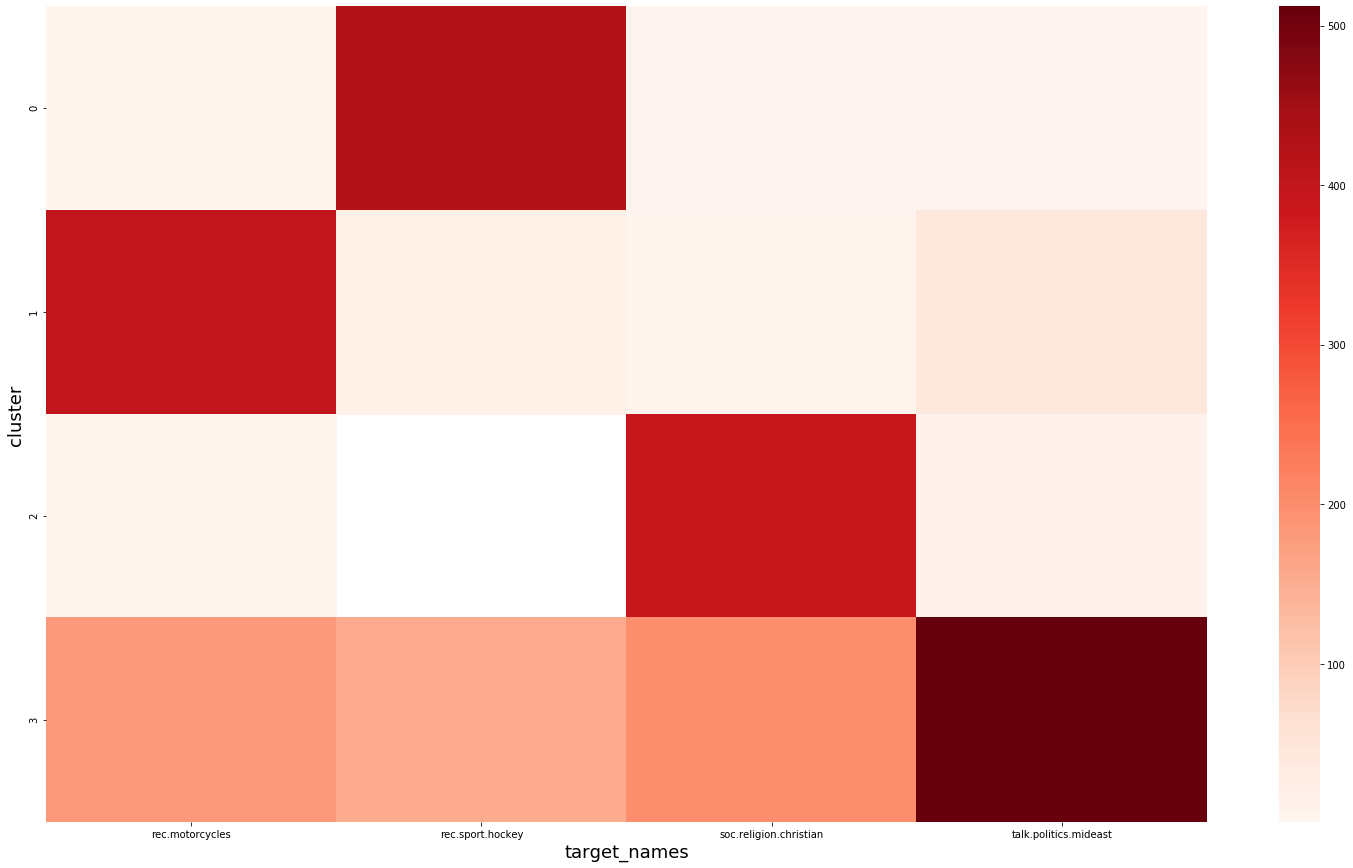

In [9]:
#Heatmap correlating clusters and target names

clusters = filtered_df.groupby(['clusters', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (26, 15))
heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('cluster').set_size(18)

In [10]:
filtered_df.loc[:,'pred']=''


C:\Users\analu\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\analu\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
filtered_df.loc[filtered_df.clusters == 0, 'pred'] =  'rec.sport.hockey'
filtered_df.loc[filtered_df.clusters == 1, 'pred'] = 'rec.motorcycles'
filtered_df.loc[filtered_df.clusters == 2, 'pred'] = 'soc.religion.christian'
filtered_df.loc[filtered_df.clusters == 3, 'pred'] = 'talk.politics.mideast'
filtered_df.head()

C:\Users\analu\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,content,target,target_names,preprocessed,clusters,pred,topics_lda
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,1,rec.motorcycles,3
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,0,rec.sport.hockey,3
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,2,soc.religion.christian,3
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,3,talk.politics.mideast,2
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,3,talk.politics.mideast,2


In [22]:
print("Classification Report: \n{0}".format(classification_report(filtered_df.target_names, filtered_df.pred)))

Classification Report: 
                        precision    recall  f1-score   support

       rec.motorcycles       0.86      0.67      0.76       598
      rec.sport.hockey       0.98      0.71      0.83       600
soc.religion.christian       0.96      0.65      0.78       599
 talk.politics.mideast       0.49      0.91      0.64       564

              accuracy                           0.73      2361
             macro avg       0.82      0.74      0.75      2361
          weighted avg       0.83      0.73      0.75      2361



The overall accuracy of the model is reasonable. The clustering seems to overestimate all topics except for politics.mideast, which is highly underestimated

## Part C)

In [13]:
from gensim.corpora import Dictionary
corpus_gen = [doc.split() for doc in filtered_df.preprocessed]

#Creating the dictionary
dictionary = Dictionary(corpus_gen)
print(dictionary)

Dictionary(21495 unique tokens: ['accel', 'axi', 'beemer', 'bike', 'bit']...)


In [14]:
#Filtering out words that appear less than 118 times and those which appear in more than 95% of the documents
dictionary.filter_extremes(no_below=118, no_above=0.95)
print(dictionary)

Dictionary(336 unique tokens: ['bike', 'bit', 'dod', 'hard', 'like']...)


In [15]:
#Bag of words - Absolute frequency
corpus = [dictionary.doc2bow(doc) for doc in corpus_gen]
print(corpus[0])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [16]:
#Latent Dirichlet Allocation (LDA) for topic modelling: training

lda = models.LdaModel(corpus,             # corpus
                      num_topics=4,       # Number of desired topics
                      id2word=dictionary, # Mapping from word IDs to words. It is used to determine the vocabulary size
                      iterations=100,     # Maximum number of iterations to infer topic distribution
                      passes=10,          # Number of passes through the corpus during training
                     chunksize = 10)          


#Difference between passes and iterations?

 The separation is not very clear. It might have fused hockey and motorbike together and separated politics.mideast in two
* 0 - 'soc.religion.christian'
* 1 - 'talk.politics.mideast'
* 2 - 'talk.politics.mideast'
* 3 - 'rec.motorcycles' + 'rec.sport.hockey'

In [17]:
#Topic Composition: Distribution of  words per topic
lda.show_topics()

[(0,
  '0.068*"team" + 0.049*"game" + 0.046*"hockei" + 0.034*"plai" + 0.031*"edu" + 0.029*"armenian" + 0.027*"new" + 0.027*"win" + 0.027*"wing" + 0.027*"year"'),
 (1,
  '0.068*"edu" + 0.061*"com" + 0.060*"write" + 0.055*"articl" + 0.047*"israel" + 0.035*"isra" + 0.032*"apr" + 0.032*"state" + 0.031*"bike" + 0.026*"jew"'),
 (2,
  '0.030*"time" + 0.029*"like" + 0.024*"know" + 0.020*"said" + 0.018*"year" + 0.017*"think" + 0.017*"go" + 0.015*"want" + 0.015*"look" + 0.015*"work"'),
 (3,
  '0.043*"god" + 0.038*"peopl" + 0.023*"christian" + 0.022*"believ" + 0.017*"reason" + 0.017*"wai" + 0.016*"thing" + 0.015*"think" + 0.015*"edu" + 0.014*"evid"')]

In [18]:
topics=lda[corpus] # Distribution of topics per document
filtered_df['topics_lda']= [max(topics[i])[0] for i in range(len(topics))]
filtered_df.head()

C:\Users\analu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,target,target_names,preprocessed,clusters,pred,topics_lda
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,1,rec.sport.hockey,3
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,0,talk.politics.mideast,3
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,2,rec.motorcycles,3
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,3,soc.religion.christian,2
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,3,soc.religion.christian,2


Looks like a total mess. There is no clear way to assign the initial target names according to the new culsters

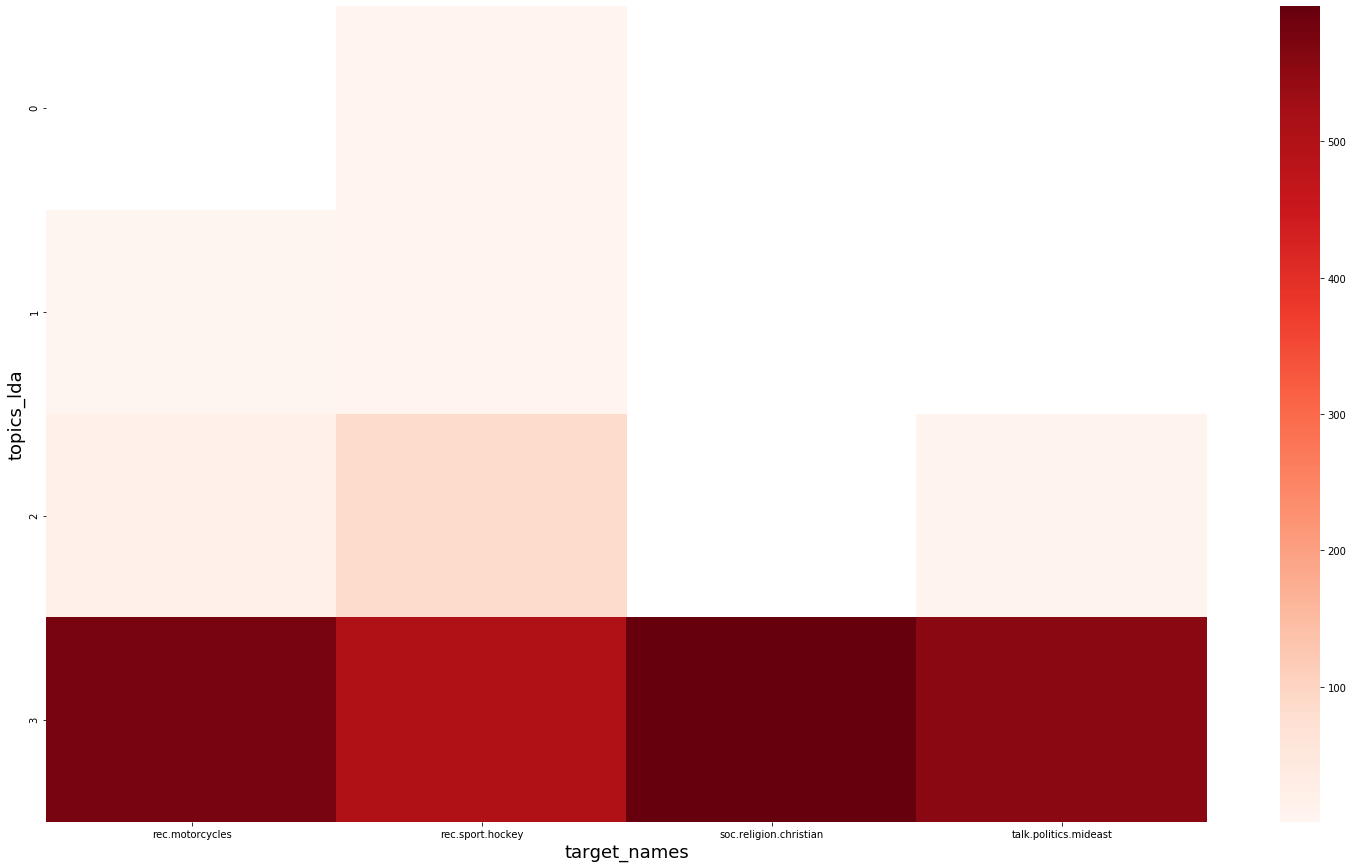

In [19]:
#Heatmap correlating LDA topics and target names

clusters = filtered_df.groupby(['topics_lda', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (26, 15))
heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('topics_lda').set_size(18)

Visualizing and Interpreting LDA generated Topics with LDAvis. Can be exported as an HTML, json or visualized in the pynotebook

* **pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, vocab, term_frequency, R=30, lambda_step=0.01, mds=<function js_PCoA>, n_jobs=-1, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, sort_topics=True**

In [20]:
pyLDAvis.enable_notebook() #enables automatic D3 display of prepared model data in the IPython notebook.

LDAvis_prepared = prepare(lda, corpus, dictionary) #transform and prepare a LDA model’s data for visualization

LDAvis_prepared #Interactive visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.084729 -0.021990       1        1  35.775902
2     -0.297708  0.051519       2        1  29.962286
1      0.151470 -0.255294       3        1  17.572817
0      0.230967  0.225764       4        1  16.688992, topic_info=       Term         Freq        Total Category  logprob  loglift
28     team  1449.000000  1449.000000  Default  30.0000  30.0000
130     com  1366.000000  1366.000000  Default  29.0000  29.0000
18      edu  2863.000000  2863.000000  Default  28.0000  28.0000
42      god  1970.000000  1970.000000  Default  27.0000  27.0000
198    game  1035.000000  1035.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
151   final   240.875946   455.947144   Topic4  -4.4790   1.1523
18      edu   662.047791  2863.955322   Topic4  -3.4680   0.3258
31    write   330.716461  2180.950684   Topic4  -4.1620  -0.0958
54    point   241.781723   744.230286   Topic4  -4.4753   0.6661
13   articl   198.250488  1685.817993   Topic4  -4.6738  -0.3501

[201 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
32        1  0.996562    accept
321       2  0.994636    action
204       3  0.642349  american
204       4  0.355533  american
157       1  0.996435    answer
...     ...       ...       ...
31        1  0.235677     write
31        3  0.612577     write
31        4  0.151769     write
115       2  0.551733      year
115       4  0.448184      year

[256 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])